In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import os.path
import icecube_load_gnssr

# path can be a list of paths if you like, or use globbing if you are only looking for certain date range, etc.
PATH_TO_DATA_DIR = os.path.join('/volstore', 'spacebridge', 'gnssr_grzice', 'data','*2020-12-01*.nc')

# choose a number of parallel processes appropriate for your set up
PARALLEL_LOADS = 10

load_class = icecube_load_gnssr.LoadGNSSR(path_to_dir=PATH_TO_DATA_DIR, multi_processing=PARALLEL_LOADS)

In [2]:
# load in all the data!
load_class.collect_tracks()

[ 2022-05-03 13:00:21.817 ] INFO icecube_load_gnssr - collect_tracks: Loading data from 371 files
[ 2022-05-03 13:00:25.787 ] INFO icecube_load_gnssr - collect_tracks: Data Loaded


/home/jc1n15/venv/lib/python3.8/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/jc1n15/venv/lib/python3.8/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/jc1n15/venv/lib/python3.8/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/jc1n15/venv/lib/python3.8/site-packages/cartopy/crs.py:385: ShapelyDeprecationWarn

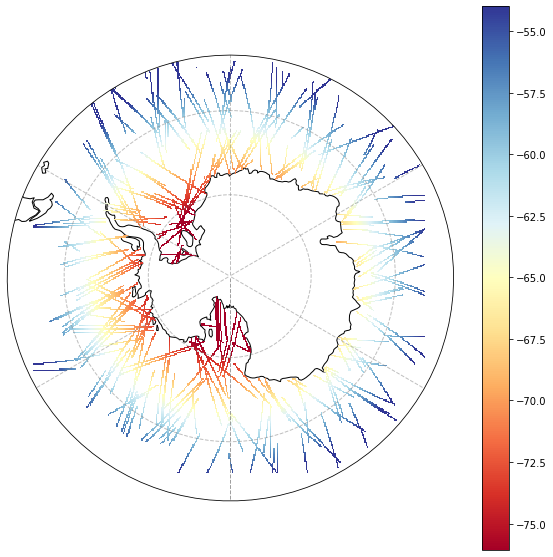

In [3]:

# plot a gridded map of the latitudes (sorry about the warnings...)
out = load_class.gridstereo('latitude', inds=load_class.data['latitude'] < 0, make_fig=True)
lat_grid, lon_grid, data_grid, mapping_axis = out

[ 2022-05-03 13:00:29.915 ] INFO icecube_load_gnssr - gridstereo: removing 3815 -999s and nans
/home/jc1n15/venv/lib/python3.8/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/jc1n15/venv/lib/python3.8/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/jc1n15/venv/lib/python3.8/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline

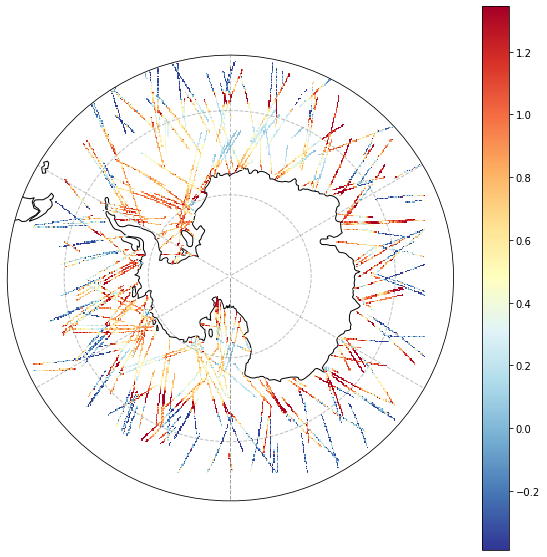

In [4]:
_ = load_class.gridstereo('excess_phase_noise', grid=25, cmap='RdYlBu_r', make_fig=True)


In [5]:
print(f'Loaded from {os.path.basename(load_class.data["files_read"][0])} to {os.path.basename(load_class.data["files_read"][-1])}')

Loaded from spire_gnss-r_L2_grzIce_v07.00_2020-12-01T00-02-30_FM122_G24.nc to spire_gnss-r_L2_grzIce_v07.00_2020-12-01T23-54-12_FM120_G17.nc


In [6]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

MIZ_grid_path = os.path.join('/volstore', 'spacebridge', 'WMIZ-25km.mat')

MIZ_grids = loadmat(MIZ_grid_path)
MIZ_grids.keys()
MIZ_lat = MIZ_grids['LAT']
MIZ_lon = MIZ_grids['LON']

Text(0.5, 1.0, 'JESS lon')

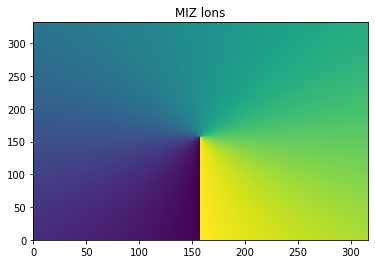

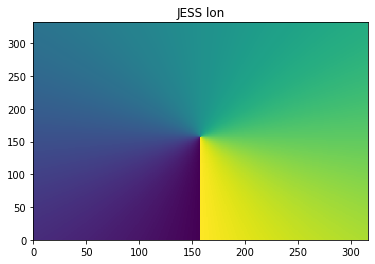

In [7]:
## need to rotate the MIZ grids 90 degrees to make them line up with mine
plt.figure()
plt.pcolor(np.rot90(MIZ_lon))
plt.title('MIZ lons')
plt.figure()
plt.pcolor(lon_grid)
plt.title('JESS lon')



(<cartopy.mpl.geocollection.GeoQuadMesh at 0x7fa4e99411f0>, <GeoAxesSubplot:>)

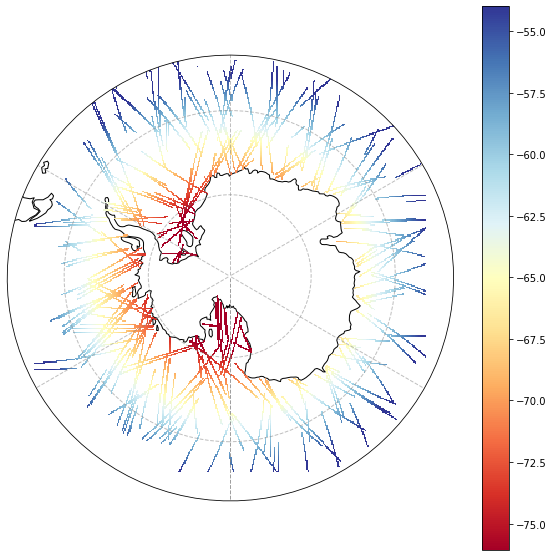

In [8]:
## proof!

load_class.pcolorstereo(np.rot90(MIZ_lat), np.rot90(MIZ_lon), data_grid, hemisphere='south', cmin=None, cmax=None, proj=None, cmap='RdYlBu')


Text(0.5, 1.0, 'lon differences')

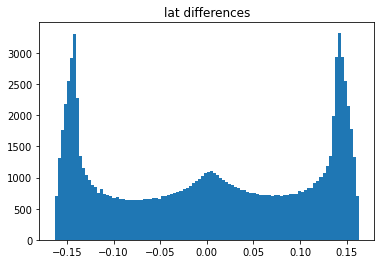

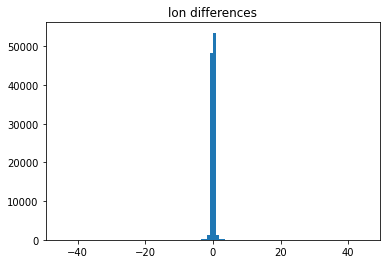

In [9]:
# histograms of the differences int he lat and lon grids
diff_lat = np.rot90(MIZ_lat) - lat_grid
plt.figure()
plt.hist(diff_lat.flatten(), bins=100)
plt.title('lat differences')


diff_lon = np.rot90(MIZ_lon) - lon_grid
plt.figure()
plt.hist(diff_lon.flatten(), bins=100)
plt.title('lon differences')

In [10]:
print('----LATS----')
for method in [np.min, np.max, np.mean, np.median]:
    print(f'{method.__name__} - {method(diff_lat.flatten())}')

print('----LONS----')
for method in [np.min, np.max, np.mean, np.median]:
    print(f'{method.__name__} - {method(diff_lon.flatten())}')

----LATS----
amin - -0.16318736568635472
amax - 0.16318263431364244
mean - 0.004074014094175137
median - 0.007028240138559738
----LONS----
amin - -45.0
amax - 45.0
mean - 0.007091049651517016
median - 0.013724406701058456


(<cartopy.mpl.geocollection.GeoQuadMesh at 0x7fa4e965b9d0>, <GeoAxesSubplot:>)

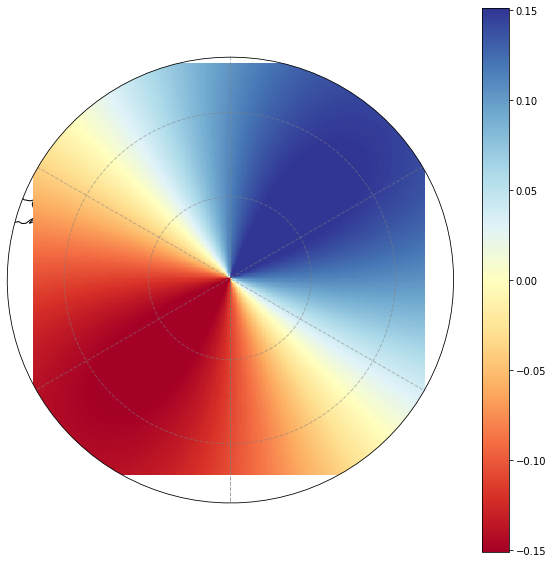

In [11]:
load_class.pcolorstereo(lat_grid, lon_grid, diff_lat, hemisphere='south', cmin=None, cmax=None, proj=None, cmap='RdYlBu')


(<cartopy.mpl.geocollection.GeoQuadMesh at 0x7fa4e98b6f10>, <GeoAxesSubplot:>)

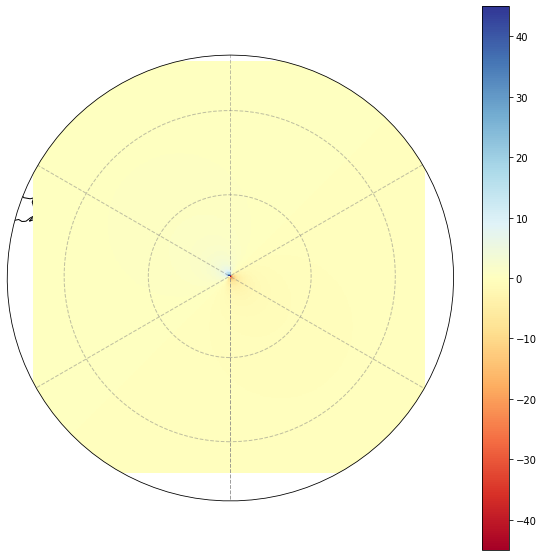

In [12]:
load_class.pcolorstereo(lat_grid, lon_grid, diff_lon, hemisphere='south', proj=None, cmap='RdYlBu', cmin=-45, cmax=45)
